# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
Business_Understanding = {
    "Problem Formulation": (
        "The business task is translated into a supervised machine learning regression problem, "
        "where the goal is to understand the impact of different factors on the selling price of used cars and to predict "
        "vehicle prices based on given information."
    ),

    "Target Variable": (
        "The variable to be predicted is the price of the used car."
    ),

    "Feature Variables": (
        "Predictor variables include both numerical and categorical vehicle attributes such as year, "
        "odometer mileage, manufacturer, model, "
        "condition, cylinders, fuel type, " 
        "and other listing characteristics."
    ),

    "Modeling Objective": (
        "The task is to learn the statistical relationship between vehicle "
        "features and price using historical vehicle listing data."
    ),

    "Analytical Goal": (
        "The analysis aims to quantify feature importance and identify which "
        "factors most strongly influence variations in used car prices."
    ),

    "Business Application": (
        "The final outcome is an interpretable predictive model that supports "
        "data-driven pricing decisions and inventory selection for a used car dealership."
    )
}


In [2]:
for topic, description in Business_Understanding.items():
    print(f"•{topic}:\n{description}\n")

•Problem Formulation:
The business task is translated into a supervised machine learning regression problem, where the goal is to understand the impact of different factors on the selling price of used cars and to predict vehicle prices based on given information.

•Target Variable:
The variable to be predicted is the price of the used car.

•Feature Variables:
Predictor variables include both numerical and categorical vehicle attributes such as year, odometer mileage, manufacturer, model, condition, cylinders, fuel type, and other listing characteristics.

•Modeling Objective:
The task is to learn the statistical relationship between vehicle features and price using historical vehicle listing data.

•Analytical Goal:
The analysis aims to quantify feature importance and identify which factors most strongly influence variations in used car prices.

•Business Application:
The final outcome is an interpretable predictive model that supports data-driven pricing decisions and inventory sele

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
# construct our data into a dataFrame through Pandas
import pandas as pd 
import numpy as np
usedCar_Origional_DF = pd.read_csv('data/vehicles.csv')

In [4]:
# Analyze and visualize the dataFrame structure and data quality
Number_of_NA = usedCar_Origional_DF.isna().sum()
Percentage_of_NA = Number_of_NA/usedCar_Origional_DF.shape[0]*100
DF_info = pd.DataFrame(
    {
        "Datatype":usedCar_Origional_DF.dtypes,
        "Counts of Unique Value":usedCar_Origional_DF.nunique(),
         "Counts of Missing DataPoint": Number_of_NA,
        "Missing%":Percentage_of_NA
    }
)
DF_info =  DF_info.sort_values("Missing%",ascending=False)
DF_info

,Datatype,Counts of Unique Value,Counts of Missing DataPoint,Missing%
size,object,4,306361,71.767476
cylinders,object,8,177678,41.622470
condition,object,6,174104,40.785232
VIN,object,118246,161042,37.725356
drive,object,3,130567,30.586347
paint_color,object,12,130203,30.501078
type,object,13,92858,21.752717
manufacturer,object,42,17646,4.133714
title_status,object,6,8242,1.930753
model,object,29649,5277,1.236179


In [5]:
print(
      "Based on the business understanding,"
      " we reviewed the entire dataset and found:\n"
    + " - The vehicles-dataset contains "+ f"{usedCar_Origional_DF.shape[0]}"+ " cars information with "
    + f"{usedCar_Origional_DF.shape[1]}"+" features. \n"
    + " - In these 18 columns features, there are: \n"
    + "     - the columns of" + f"{DF_info.loc[DF_info["Missing%"]>40].index.tolist()}" + " have more than 40% missing data points. \n"
    + "        - the columns of" + f"{DF_info.loc[DF_info["Missing%"]>60].index.tolist()}" + " ,missed 71.76% data points, should be dropped to avoid noise introduction. \n"
    + "        - the rest columns might be kept and NA replaced with unkonwn if they show predictive features. \n"
    + "     - the columns of" + f"{DF_info.loc[(DF_info["Missing%"] > 5) & (DF_info["Missing%"] <= 40)].index.tolist()}" + " have 5-40% missing data points. \n"
    + "        - VIN will be dropped due to its identifier role of each vehicle and won't be generalized for price prediction. \n"
    + "        - the rest columns may be kept with NA values replaced with 'unkonwn' if they show useful signal. \n"
    + "     - the columns of" + f"{DF_info.loc[(DF_info["Missing%"] > 0) & (DF_info["Missing%"] <= 5)].index.tolist()}\n" + "      have lesss than 5% missing data points. \n"
    + "        - The missing data points most likely will be dropped to keep the integrity of the dataFrame \n"
    + "     - the columns of" + f"{DF_info.loc[DF_info["Missing%"] == 0].index.tolist()}" + " have no missing data point. \n"
    + " - The price column is the target variable, and will be used as the output for supervised machine learning. \n"
)

Based on the business understanding, we reviewed the entire dataset and found:
 - The vehicles-dataset contains 426880 cars information with 18 features. 
 - In these 18 columns features, there are: 
     - the columns of['size', 'cylinders', 'condition'] have more than 40% missing data points. 
        - the columns of['size'] ,missed 71.76% data points, should be dropped to avoid noise introduction. 
        - the rest columns might be kept and NA replaced with unkonwn if they show predictive features. 
     - the columns of['VIN', 'drive', 'paint_color', 'type'] have 5-40% missing data points. 
        - VIN will be dropped due to its identifier role of each vehicle and won't be generalized for price prediction. 
        - the rest columns may be kept with NA values replaced with 'unkonwn' if they show useful signal. 
     - the columns of['manufacturer', 'title_status', 'model', 'odometer', 'fuel', 'transmission', 'year']
      have lesss than 5% missing data points. 
        - The

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [6]:
# Data Cleaning
usedCar_Cleaned_DF = usedCar_Origional_DF.drop(columns=['id','VIN','size']) # drop the columns with too many missing data and low generalization value
usedCar_Cleaned_DF = usedCar_Cleaned_DF[usedCar_Cleaned_DF['price']>0] # remove the invalue target value
usedCar_Cleaned_DF = usedCar_Cleaned_DF[usedCar_Cleaned_DF['odometer']>0] # remove the invalue numerical feature value
usedCar_Cleaned_DF = usedCar_Cleaned_DF.dropna(subset = ['manufacturer', 'title_status', 
                                                         'model', 'odometer', 'fuel', 'transmission', 'year']) # drop the raws include missing critical predictors
current_year = 2026
usedCar_Cleaned_DF["car_age"] = current_year - usedCar_Cleaned_DF["year"]# change the year to car age represent the age of the used car
usedCar_Cleaned_DF = usedCar_Cleaned_DF.drop(columns=["year"]) 
usedCar_Cleaned_DF = usedCar_Cleaned_DF[usedCar_Cleaned_DF["car_age"] >=0]  # remove the invalue numerical feature value

object_col = usedCar_Cleaned_DF.select_dtypes('object').columns
usedCar_Cleaned_DF[object_col] = usedCar_Cleaned_DF[object_col].fillna('unknown')

print(usedCar_Cleaned_DF.info())
print(usedCar_Cleaned_DF.nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 360374 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        360374 non-null  object 
 1   price         360374 non-null  int64  
 2   manufacturer  360374 non-null  object 
 3   model         360374 non-null  object 
 4   condition     360374 non-null  object 
 5   cylinders     360374 non-null  object 
 6   fuel          360374 non-null  object 
 7   odometer      360374 non-null  float64
 8   title_status  360374 non-null  object 
 9   transmission  360374 non-null  object 
 10  drive         360374 non-null  object 
 11  type          360374 non-null  object 
 12  paint_color   360374 non-null  object 
 13  state         360374 non-null  object 
 14  car_age       360374 non-null  float64
dtypes: float64(2), int64(1), object(12)
memory usage: 44.0+ MB
None
region            404
price           14662
manufacturer       41
model     

In [7]:
print(
    "After the cleaning, now dataset has: \n"
    + " - No missing data points \n"
    + " - "+f"{len(usedCar_Cleaned_DF.select_dtypes(include=["int64","float64"]).columns)-1}" +" columns have numerical explanationary data. \n"
    + " - " f"{len(usedCar_Cleaned_DF.select_dtypes(include=["object"]).columns)}" +" columns have categorical data. \n"
    + " - " f"{usedCar_Cleaned_DF.select_dtypes(include=["object"]).nunique().sum()}" +" unqiue categorical data points"
)

After the cleaning, now dataset has: 
 - No missing data points 
 - 2 columns have numerical explanationary data. 
 - 12 columns have categorical data. 
 - 21303 unqiue categorical data points


In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

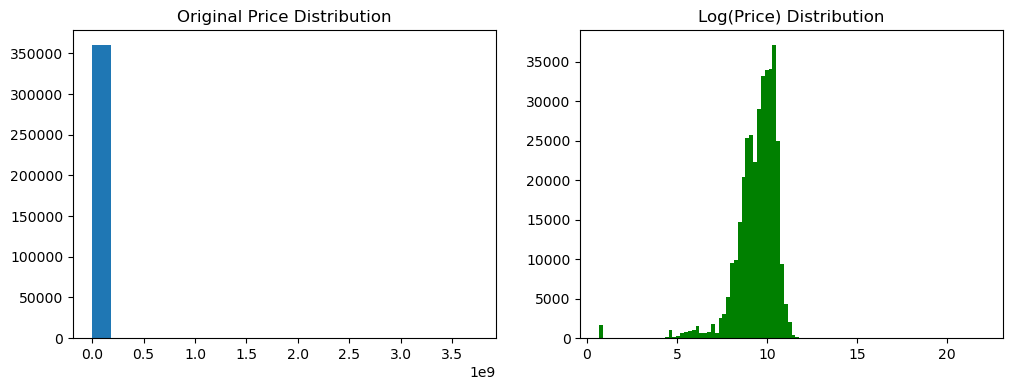

In [9]:
# Price Distribution Comparison
plt.figure(figsize=(12,4))

# Original price
plt.subplot(1,2,1)
plt.hist(usedCar_Cleaned_DF['price'],bins=20)
#ax = plt.gca()
#ax.ticklabel_format(style='sci', axis='x', scilimits=(0.1,0.1))  # force 1e8
plt.title("Original Price Distribution")

# Log price
plt.subplot(1,2,2)
plt.hist(np.log1p(usedCar_Cleaned_DF['price']), bins=100,color = 'green')
plt.title("Log(Price) Distribution")

plt.show()

In [10]:
price_hist_table = pd.cut(
    usedCar_Cleaned_DF["price"],
    bins=100
).value_counts().sort_index()

price_hist_table

price
(-3736927.71, 37369288.1]       360361
(37369288.1, 74738575.2]             0
(74738575.2, 112107862.3]            1
(112107862.3, 149477149.4]           5
(149477149.4, 186846436.5]           0
                                 ...  
(3550082275.5, 3587451562.6]         0
(3587451562.6, 3624820849.7]         0
(3624820849.7, 3662190136.8]         0
(3662190136.8, 3699559423.9]         0
(3699559423.9, 3736928711.0]         2
Name: count, Length: 100, dtype: int64

In [11]:
price_hist_table = pd.cut(
    usedCar_Cleaned_DF.loc[
        usedCar_Cleaned_DF["price"] < 12000000,  # row condition
        "price"                                # selected column
    ],
    bins=18
).value_counts().sort_index()
price_hist_table

price
(-11110.11, 617284.889]        360341
(617284.889, 1234568.778]          14
(1234568.778, 1851852.667]          0
(1851852.667, 2469136.556]          1
(2469136.556, 3086420.444]          0
(3086420.444, 3703704.333]          0
(3703704.333, 4320988.222]          0
(4320988.222, 4938272.111]          0
(4938272.111, 5555556.0]            0
(5555556.0, 6172839.889]            0
(6172839.889, 6790123.778]          0
(6790123.778, 7407407.667]          1
(7407407.667, 8024691.556]          0
(8024691.556, 8641975.444]          0
(8641975.444, 9259259.333]          0
(9259259.333, 9876543.222]          0
(9876543.222, 10493827.111]         1
(10493827.111, 11111111.0]          1
Name: count, dtype: int64

In [12]:
price_hist_table = pd.cut(
    usedCar_Cleaned_DF.loc[
        usedCar_Cleaned_DF["price"] < 10000,  # row condition
        "price"                                # selected column
    ],
    bins=10
).value_counts().sort_index()
price_hist_table

price
(-8.998, 1000.8]    11703
(1000.8, 2000.6]     6121
(2000.6, 3000.4]    10067
(3000.4, 4000.2]    13624
(4000.2, 5000.0]    15195
(5000.0, 5999.8]    14224
(5999.8, 6999.6]    16101
(6999.6, 7999.4]    15040
(7999.4, 8999.2]    13703
(8999.2, 9999.0]    12410
Name: count, dtype: int64

In [13]:
print(
    "The left histogram shows:\n"
    " - Most used car prices are concentrated in the low price range (< $40k).\n"
    " - Fewer vehicles appear in the mid price range ($40k–$70k).\n"
    " - High-priced vehicles (> $70k) are relatively rare.\n"
    " - The original price distribution is highly right-skewed, indicating that a logarithmic transformation may be necessary to stabilize variance and reduce the influence of extreme values on the loss function.\n\n"

    "The right histogram shows the logarithmic transformation of price:\n"
    " - The distribution becomes closer to a normal (bell-shaped) distribution.\n"
    " - Applying a logarithmic transformation is expected to improve regression model stability and performance.\n"

    "The histogram table clealy showed there are outlier way beyong the normal distribution, considered as outlier and will be removed to better loss function control"
)
usedCar_Cleaned_DF = usedCar_Cleaned_DF[usedCar_Cleaned_DF['price']<617284.889]
usedCar_Cleaned_DF = usedCar_Cleaned_DF[usedCar_Cleaned_DF['price']>1000]


The left histogram shows:
 - Most used car prices are concentrated in the low price range (< $40k).
 - Fewer vehicles appear in the mid price range ($40k–$70k).
 - High-priced vehicles (> $70k) are relatively rare.
 - The original price distribution is highly right-skewed, indicating that a logarithmic transformation may be necessary to stabilize variance and reduce the influence of extreme values on the loss function.

The right histogram shows the logarithmic transformation of price:
 - The distribution becomes closer to a normal (bell-shaped) distribution.
 - Applying a logarithmic transformation is expected to improve regression model stability and performance.
The histogram table clealy showed there are outlier way beyong the normal distribution, considered as outlier and will be removed to better loss function control


In [14]:
usedCar_Cleaned_DF_merge_model = usedCar_Cleaned_DF.copy()
usedCar_Cleaned_DF_merge_model['make_model'] =(usedCar_Cleaned_DF_merge_model['manufacturer']+" "+usedCar_Cleaned_DF_merge_model['model'])
usedCar_Cleaned_DF_merge_model = usedCar_Cleaned_DF_merge_model.drop(columns = ['model','manufacturer'])

In [15]:
print(usedCar_Cleaned_DF_merge_model.select_dtypes(include=["object"]).nunique().sum())

20999


In [16]:
print(
    'model has 20746 unqiue categorical datapoint and will lead to a huge explansion on the column when introducing dummy. \n'
    'serveral attempts has been down: \n'
    '1. merge model and manufacturer since they are highly corealated, but the results showing: \n' 
    + '   - before merging has ' + f"{usedCar_Cleaned_DF.select_dtypes(include=["object"]).nunique().sum()}" + " unique categorical data points. \n"
    + '   - after merging has ' + f"{usedCar_Cleaned_DF_merge_model.select_dtypes(include=["object"]).nunique().sum()}" + " unique categorical data points. \n" 
    + '   - the merging did not support the data dimensional decrease.'
)

model has 20746 unqiue categorical datapoint and will lead to a huge explansion on the column when introducing dummy. 
serveral attempts has been down: 
1. merge model and manufacturer since they are highly corealated, but the results showing: 
   - before merging has 20652 unique categorical data points. 
   - after merging has 20999 unique categorical data points. 
   - the merging did not support the data dimensional decrease.


In [17]:
usedCar_Cleaned_DF_merge_region = usedCar_Cleaned_DF.copy()
usedCar_Cleaned_DF_merge_region['state_region'] =(usedCar_Cleaned_DF_merge_model['state']+" "+usedCar_Cleaned_DF_merge_model['region'])
usedCar_Cleaned_DF_merge_region = usedCar_Cleaned_DF_merge_model.drop(columns = ['state','region'])

In [18]:
print(usedCar_Cleaned_DF_merge_region.select_dtypes(include=["object"]).nunique().sum())

20544


In [19]:
print(
    'Region has 404 unqiue categorical datapoint and will lead to a huge explansion on the column when introducing dummy like model. \n'
    'serveral attempts has been down: \n'
    '2. merge region and state since they are highly corealated, but the results showing: \n' 
    + '   - before merging has ' + f"{usedCar_Cleaned_DF.select_dtypes(include=["object"]).nunique().sum()}" + " unique categorical data points. \n"
    + '   - after merging has ' + f"{usedCar_Cleaned_DF_merge_region.select_dtypes(include=["object"]).nunique().sum()}" + " unique categorical data points. \n" 
    + '   - the merging on region and state did slightly support the data dimensional reduction(almost 100 dummies) and could diretcly apply to the orgional database without impacting the information.'
)

Region has 404 unqiue categorical datapoint and will lead to a huge explansion on the column when introducing dummy like model. 
serveral attempts has been down: 
2. merge region and state since they are highly corealated, but the results showing: 
   - before merging has 20652 unique categorical data points. 
   - after merging has 20544 unique categorical data points. 
   - the merging on region and state did slightly support the data dimensional reduction(almost 100 dummies) and could diretcly apply to the orgional database without impacting the information.


In [20]:
# Data Spliting for later training
usedCar_Cleaned_DF['state_region'] =(usedCar_Cleaned_DF['state']+" "+usedCar_Cleaned_DF['region'])
usedCar_Cleaned_DF = usedCar_Cleaned_DF.drop(columns = ['state','region'])
y = np.log1p(usedCar_Cleaned_DF['price']) # target
X = usedCar_Cleaned_DF.drop(columns= ['price']) # features for modeling

In [21]:
print(
    'Now, in order to futher deacrese the amount of dummies generated for model and reach dimensionl reduction purpose,'
    'We will need to group the low frequency models to one group named "other". '
)
def reduce_category_to_top_k(df, column, k, other_label="other"):
    df_copy = df.copy()

    top_k_values = (
        df_copy[column]
        .value_counts()
        .nlargest(k)
        .index
    )

    df_copy[column] = df_copy[column].where(
        df_copy[column].isin(top_k_values),
        other_label
    )

    return df_copy


Now, in order to futher deacrese the amount of dummies generated for model and reach dimensionl reduction purpose,We will need to group the low frequency models to one group named "other". 


In [22]:
# Train/test Split
# 80% of the data is used to map relationships, tune hyperparameters and fit model parameters
# 20% of teh data is used for final performance evaluation and unbiased measurement
# Each set of the data were randomly selected from the origional.

from sklearn.model_selection import train_test_split
def prepare_train_test_split(
        df,
        target_col="price",
        test_size=0.2,
        random_state=42,
        log_target=True
    ):

    df_copy = df.copy()
    X = df_copy.drop(columns=[target_col])
    y = df_copy[target_col]

    if log_target:
        y = np.log1p(y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state
    )

    return X_train, X_test, y_train, y_test

X_train, X_validation, y_train, y_validation = prepare_train_test_split(
    usedCar_Cleaned_DF, target_col="price", test_size=0.2, random_state=42, log_target=True
)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [23]:
print(
    "Modeling Strategy: \n"
    +"From what methology that module has provided so far, the regression tool boxes have: \n"
    +" - Linear Regression - Linear Regression/MutiLinear Regression+ OneHotEncoder \n"
    +" - Polynomial Regression - Linear Regression + OneHotEncoder + Polynomial Feartures + Sequential Featrue Selection \n"
    +" - Ridge Regression \n"
    +" - LASSO Regression \n"
    +" - Time Series Analysis and Forecasting \n"
    +"Since the data is categorical-dominated, not time-dependent, and has 21303 unqiue categorical data points,"
    +" the methods of Polynomial Regression and Time Series Analysis and Forecasting are either not ideal or applicable. \n"
    +"\n"
    +"Modeling Flow: \n"
    +"1. Data preprocessing include numeric data scaling and catgegorical data transformation \n"
    +"2. Linear Regression as the baseline model \n"
    +"3. Ridge Regression with different alpha input \n"
    +"4. LASSO Regression \n"
)

Modeling Strategy: 
From what methology that module has provided so far, the regression tool boxes have: 
 - Linear Regression - Linear Regression/MutiLinear Regression+ OneHotEncoder 
 - Polynomial Regression - Linear Regression + OneHotEncoder + Polynomial Feartures + Sequential Featrue Selection 
 - Ridge Regression 
 - LASSO Regression 
 - Time Series Analysis and Forecasting 
Since the data is categorical-dominated, not time-dependent, and has 21303 unqiue categorical data points, the methods of Polynomial Regression and Time Series Analysis and Forecasting are either not ideal or applicable. 

Modeling Flow: 
1. Data preprocessing include numeric data scaling and catgegorical data transformation 
2. Linear Regression as the baseline model 
3. Ridge Regression with different alpha input 
4. LASSO Regression 



In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# identify feature typess
numerical_cols = X_train.select_dtypes(include=["int64","float64"]).columns
categorical_cols = X_train.select_dtypes(include="object").columns

# numeric preprocessing
num_pipe = Pipeline([
    ("scaler", StandardScaler())
])

# categorical preprocessing
cat_pipe = Pipeline([
    ("dummy", OneHotEncoder(handle_unknown="ignore"))
])

DF_pre_processor = ColumnTransformer([
    ("numerical_data", num_pipe, numerical_cols),
    ("categorical_data", cat_pipe, categorical_cols)
])


In [25]:
# Baseline Linear Regression Model
from sklearn.linear_model import LinearRegression

linear_model = Pipeline([
    ("prep", DF_pre_processor),
    ("model", LinearRegression())
])

In [26]:
# Ridge Model
from sklearn.linear_model import Ridge

ridge_model = Pipeline([
    ("prep", DF_pre_processor),
    ("model", Ridge())
])


In [27]:
# LASSO Model
from sklearn.linear_model import Lasso

lasso_model = Pipeline([
    ("prep", DF_pre_processor),
    ("model", Lasso(max_iter=10000))
])


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [28]:
print(
    "Evaluation strategy: \n"
    +" - Determine the hyperparameter for each model. \n"
    +" - Determine the model with best performance. \n"
    "Evaluation Flow: \n"
    +" - Fit each model to the training dataset. \n"
    +" - Evaluate linear regression performance. \n"
    +" - Evaluate Ridge regression performance with different alpha inputs. \n"
    +" - Evaluate Lasso regression performance with different alpha inputs. \n"
    +" - Compare all models using MAE,MSE abd R^2 to identify the performance difference. \n"
    +" - Select the final model based on the predictive performance for final deployment."
)

Evaluation strategy: 
 - Determine the hyperparameter for each model. 
 - Determine the model with best performance. 
Evaluation Flow: 
 - Fit each model to the training dataset. 
 - Evaluate linear regression performance. 
 - Evaluate Ridge regression performance with different alpha inputs. 
 - Evaluate Lasso regression performance with different alpha inputs. 
 - Compare all models using MAE,MSE abd R^2 to identify the performance difference. 
 - Select the final model based on the predictive performance for final deployment.


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
# Fit the baseline model to define the hyperparameter for groupping model
top_model_list = np.arange(100, X_train["model"].nunique(), 100)

results = []

for k in top_model_list:
    top_models = X_train["model"].value_counts().nlargest(int(k)).index

    X_train_k = X_train.copy()
    X_validation_k = X_validation.copy()

    X_train_k["model"] = X_train_k["model"].where(X_train_k["model"].isin(top_models), "other")
    X_validation_k["model"] = X_validation_k["model"].where(X_validation_k["model"].isin(top_models), "other")

    linear_model.fit(X_train_k, y_train)
    y_pred_log = linear_model.predict(X_validation_k)

    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_validation)

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_validation, y_pred_log)  # log-space R²

    results.append([int(k), mae, rmse, r2])

results_df = pd.DataFrame(results, columns=["TopK_Model", "MAE ($)", "RMSE ($)", "R² (log-space)"])
results_df.sort_values("MAE ($)").head(10)

,TopK_Model,MAE ($),RMSE ($),R² (log-space)
170,17100,4085.962060,8463.982027,0.731955
171,17200,4086.525405,8530.739000,0.731649
169,17000,4086.698164,8469.143148,0.732066
167,16800,4088.543552,8466.318139,0.732097
172,17300,4088.830732,8538.404749,0.731289
174,17500,4090.112018,8561.010465,0.730682
168,16900,4091.445597,8483.614975,0.731732
173,17400,4092.788098,8553.103276,0.730873
175,17600,4095.515991,8577.867411,0.730120
166,16700,4096.482925,8480.597963,0.731454


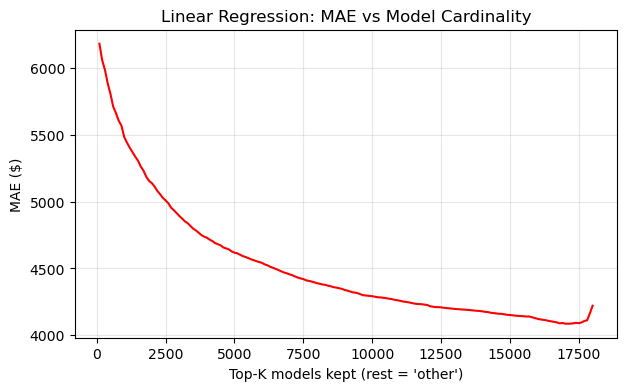

In [31]:
plt.figure(figsize=(7,4))
plt.plot(results_df["TopK_Model"], results_df["MAE ($)"],color = 'red')
plt.xlabel("Top-K models kept (rest = 'other')")
plt.ylabel("MAE ($)")
plt.title("Linear Regression: MAE vs Model Cardinality")
plt.grid(True, alpha=0.3)
plt.show()

In [38]:
print(
    'Now that the optimal Top-K model hyperparameter has been determined, ' 
    + f"{results_df.sort_values("MAE ($)")['TopK_Model'].iloc[0]}"
    +' , next is to proceed to regularized regression methods to further refine and stabilize the predictive model.'
)
 
top_models = X_train["model"].value_counts().nlargest(results_df.sort_values("MAE ($)")['TopK_Model'].iloc[0]).index

X_train_k = X_train.copy()
X_validation_k = X_validation.copy()

X_train_k["model"] = X_train_k["model"].where(X_train_k["model"].isin(top_models), "other").copy()
X_validation_k["model"] = X_validation_k["model"].where(X_validation_k["model"].isin(top_models), "other").copy()

Now that the optimal Top-K model hyperparameter has been determined, 17100 , next is to proceed to regularized regression methods to further refine and stabilize the predictive model.


In [40]:
alpha_list = np.arange(1,100000,100)

In [41]:
ridge_model_results = []

y_validation_actual = np.expm1(y_validation)  

for a in alpha_list:
    ridge_model.set_params(model__alpha=a)

    ridge_model.fit(X_train_k, y_train)
    
    y_ridge_predict_log = ridge_model.predict(X_validation_k)

    y_ridge_predict = np.expm1(y_ridge_predict_log)

    ridge_mae = mean_absolute_error(y_validation_actual, y_ridge_predict)
    ridge_rmse = np.sqrt(mean_squared_error(y_validation_actual, y_ridge_predict))
    ridge_r2 = r2_score(y_validation, y_ridge_predict_log)  # log-space R²

    ridge_model_results.append([a, ridge_mae, ridge_rmse, ridge_r2])

ridge_results_df = pd.DataFrame(
    ridge_model_results,
    columns=["Alpha", "MAE ($)", "RMSE ($)", "R² (log-space)"]
).sort_values("MAE ($)").reset_index(drop=True)

ridge_results_df


,Alpha,MAE ($),RMSE ($),R² (log-space)
0,1,4274.728661,7739.239794,0.732458
1,101,5581.459082,9200.795793,0.640692
2,201,5774.902344,9464.997395,0.620286
3,301,5878.201943,9604.208305,0.608804
4,401,5947.019042,9696.551788,0.600936
...,...,...,...,...
995,99501,7986.030012,12286.542464,0.412453
996,99601,7987.028287,12287.667269,0.412370
997,99701,7988.025702,12288.791187,0.412288
998,99801,7989.022228,12289.914221,0.412206


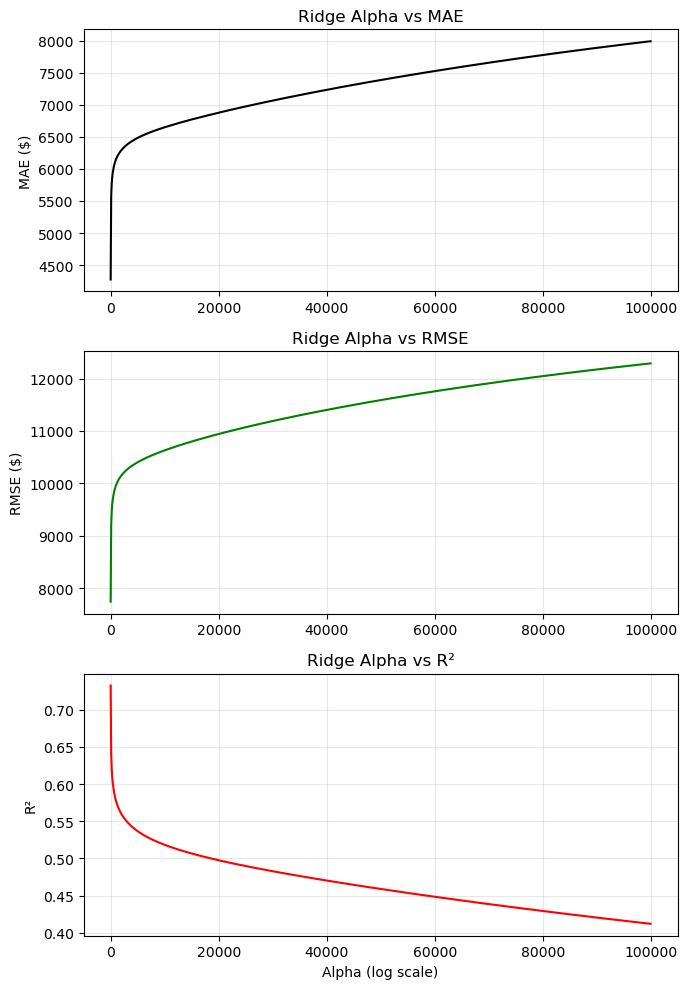

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(7,10))

axes[0].plot(
    ridge_results_df["Alpha"],
    ridge_results_df["MAE ($)"],
    color = 'black'
)
axes[0].set_title("Ridge Alpha vs MAE")
axes[0].set_ylabel("MAE ($)")
axes[0].grid(True, alpha=0.3)

axes[1].plot(
    ridge_results_df["Alpha"],
    ridge_results_df["RMSE ($)"],
    color = 'green'
)
axes[1].set_title("Ridge Alpha vs RMSE")
axes[1].set_ylabel("RMSE ($)")
axes[1].grid(True, alpha=0.3)

axes[2].plot(
    ridge_results_df["Alpha"],
    ridge_results_df["R² (log-space)"],
    color = 'red'
)
axes[2].set_title("Ridge Alpha vs R²")
axes[2].set_xlabel("Alpha (log scale)")
axes[2].set_ylabel("R²")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [43]:
lasso_model_results = []

for a in alpha_list:
    lasso_model.set_params(model__alpha=a)

    lasso_model.fit(X_train_k, y_train)
    
    y_lasso_predict_log = lasso_model.predict(X_validation_k)

    y_lasso_predict = np.expm1(y_lasso_predict_log)

    lasso_mae = mean_absolute_error(y_validation_actual, y_lasso_predict)
    lasso_rmse = np.sqrt(mean_squared_error(y_validation_actual, y_lasso_predict))
    lasso_r2 = r2_score(y_validation, y_lasso_predict_log) 

    lasso_model_results.append([a, lasso_mae, lasso_rmse, lasso_r2])

lasso_results_df = pd.DataFrame(
    lasso_model_results,
    columns=["Alpha", "MAE ($)", "RMSE ($)", "R² (log-space)"]
).sort_values("MAE ($)").reset_index(drop=True)

lasso_results_df

,Alpha,MAE ($),RMSE ($),R² (log-space)
0,1,11174.662598,15519.7663,-0.000026
1,65801,11174.662598,15519.7663,-0.000026
2,65901,11174.662598,15519.7663,-0.000026
3,66001,11174.662598,15519.7663,-0.000026
4,66101,11174.662598,15519.7663,-0.000026
...,...,...,...,...
995,33901,11174.662598,15519.7663,-0.000026
996,34001,11174.662598,15519.7663,-0.000026
997,34101,11174.662598,15519.7663,-0.000026
998,32801,11174.662598,15519.7663,-0.000026


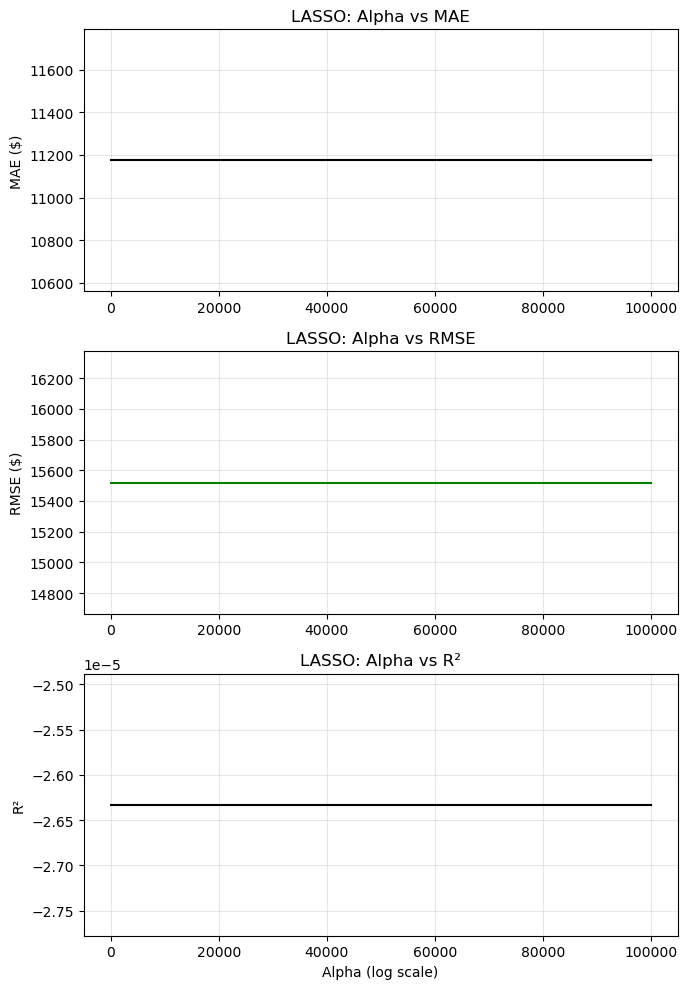

In [44]:
fig, axes = plt.subplots(3, 1, figsize=(7,10))

axes[0].plot(
    lasso_results_df["Alpha"],
    lasso_results_df["MAE ($)"],
    color = 'black'
)
axes[0].set_title("LASSO: Alpha vs MAE")
axes[0].set_ylabel("MAE ($)")
axes[0].grid(True, alpha=0.3)

axes[1].plot(
    lasso_results_df["Alpha"],
    lasso_results_df["RMSE ($)"],
    color = 'green'
)
axes[1].set_title("LASSO: Alpha vs RMSE")
axes[1].set_ylabel("RMSE ($)")
axes[1].grid(True, alpha=0.3)

axes[2].plot(
    lasso_results_df["Alpha"],
    lasso_results_df["R² (log-space)"],
    color = 'black'
)
axes[2].set_title("LASSO: Alpha vs R²")
axes[2].set_xlabel("Alpha (log scale)")
axes[2].set_ylabel("R²")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [47]:
best_linear = results_df.loc[
    results_df["MAE ($)"].idxmin()
].copy()
best_linear["Model"] = "Linear Regression"
best_ridge = ridge_results_df.loc[
    ridge_results_df["MAE ($)"].idxmin()
].copy()
best_ridge["Model"] = "Ridge Regression"
best_lasso = lasso_results_df.loc[
    lasso_results_df["MAE ($)"].idxmin()
].copy()
best_lasso["Model"] = "LASSO Regression"
best_models_df = pd.DataFrame([
    best_linear,
    best_ridge,
    best_lasso
]).reset_index(drop=True)

cols = ["Model"] + [c for c in best_models_df.columns if c != "Model"]
best_models_df = best_models_df[cols]
print(best_models_df)
print(
    'The Linear Regression Model provides the lowest MAE and best performance.'
)

               Model  TopK_Model       MAE ($)      RMSE ($)  R² (log-space)  \
0  Linear Regression     17100.0   4085.962060   8463.982027        0.731955   
1   Ridge Regression         NaN   4274.728661   7739.239794        0.732458   
2   LASSO Regression         NaN  11174.662598  15519.766300       -0.000026   

   Alpha  
0    NaN  
1    1.0  
2    1.0  
The Linear Regression Model provides the lowest MAE and best performance.


In [48]:
top_k = 17100
X_full = pd.concat([X_train, X_validation], axis=0)
y_full = pd.concat([y_train, y_validation], axis=0)

top_models = X_full["model"].value_counts().nlargest(top_k).index
X_full_k = X_full.copy()
X_full_k["model"] = X_full_k["model"].where(X_full_k["model"].isin(top_models), "other")

linear_model.fit(X_full_k, y_full)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numerical_data',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['odometer', 'car_age'], dtype='object')),
                                                 ('categorical_data',
                                                  Pipeline(steps=[('dummy',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'state_region'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [49]:
feature_names = linear_model.named_steps["prep"].get_feature_names_out()
coefs = linear_model.named_steps["model"].coef_

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefs
}).sort_values("Coefficient", ascending=False)

In [55]:
model_coef_df = coef_df[
    coef_df["Feature"].str.contains("categorical_data__model_")
].copy()
model_coef_df.head(20)

,Feature,Coefficient
43,"categorical_data__model_""t""",9.045419
10798,categorical_data__model_model l roadster,6.269982
3369,categorical_data__model_c10 cst,5.785162
10862,categorical_data__model_monza 2+2,5.391545
5376,categorical_data__model_deuce coupe,5.110156
12858,categorical_data__model_rx-4,5.084737
11136,categorical_data__model_nomad,5.076573
1535,categorical_data__model_5 window coupe,4.773244
10786,categorical_data__model_model 70,4.651049
12671,categorical_data__model_roasdster,4.642274


In [57]:
manufacturer_coef_df = coef_df[
    coef_df["Feature"].str.contains("categorical_data__manufacturer_")
].copy()
manufacturer_coef_df.head(20)

,Feature,Coefficient
13,categorical_data__manufacturer_ferrari,2.086973
34,categorical_data__manufacturer_porsche,1.421173
4,categorical_data__manufacturer_aston-martin,0.871908
33,categorical_data__manufacturer_pontiac,0.850474
3,categorical_data__manufacturer_alfa-romeo,0.817234
39,categorical_data__manufacturer_tesla,0.642314
36,categorical_data__manufacturer_rover,0.461255
24,categorical_data__manufacturer_land rover,0.438299
21,categorical_data__manufacturer_jaguar,0.435404
15,categorical_data__manufacturer_ford,0.341459


In [58]:
condition_coef_df = coef_df[
    coef_df["Feature"].str.contains("categorical_data__condition_")
].copy()
condition_coef_df.head(20)

,Feature,Coefficient
17147,categorical_data__condition_new,0.431997
17146,categorical_data__condition_like new,0.262747
17149,categorical_data__condition_unknown,0.242897
17143,categorical_data__condition_excellent,0.187562
17145,categorical_data__condition_good,-0.025493
17148,categorical_data__condition_salvage,-0.499635
17144,categorical_data__condition_fair,-0.600074


In [59]:
cylinders_coef_df = coef_df[
    coef_df["Feature"].str.contains("categorical_data__cylinders_")
].copy()
cylinders_coef_df.head(20)

,Feature,Coefficient
17151,categorical_data__cylinders_12 cylinders,0.234398
17152,categorical_data__cylinders_3 cylinders,0.070833
17158,categorical_data__cylinders_unknown,0.024230
17156,categorical_data__cylinders_8 cylinders,0.012491
17157,categorical_data__cylinders_other,-0.004180
17153,categorical_data__cylinders_4 cylinders,-0.020843
17150,categorical_data__cylinders_10 cylinders,-0.044432
17155,categorical_data__cylinders_6 cylinders,-0.046717
17154,categorical_data__cylinders_5 cylinders,-0.225780


In [60]:
fuel_coef_df = coef_df[
    coef_df["Feature"].str.contains("categorical_data__fuel_")
].copy()
fuel_coef_df.head(20)

,Feature,Coefficient
17159,categorical_data__fuel_diesel,0.155701
17160,categorical_data__fuel_electric,-0.010191
17163,categorical_data__fuel_other,-0.018775
17162,categorical_data__fuel_hybrid,-0.057673
17161,categorical_data__fuel_gas,-0.069061


In [61]:
title_status_coef_df = coef_df[
    coef_df["Feature"].str.contains("categorical_data__title_status_")
].copy()
title_status_coef_df.head(20)

,Feature,Coefficient
17165,categorical_data__title_status_lien,0.254628
17164,categorical_data__title_status_clean,0.189560
17168,categorical_data__title_status_rebuilt,0.069619
17166,categorical_data__title_status_missing,-0.014899
17169,categorical_data__title_status_salvage,-0.086121
17167,categorical_data__title_status_parts only,-0.412787


In [64]:
drive_coef_df = coef_df[
    coef_df["Feature"].str.contains("categorical_data__drive_")
].copy()
drive_coef_df.head(20)

,Feature,Coefficient
17173,categorical_data__drive_4wd,0.082147
17174,categorical_data__drive_fwd,-0.007438
17175,categorical_data__drive_rwd,-0.008497
17176,categorical_data__drive_unknown,-0.066212


In [65]:
transmission_coef_df = coef_df[
    coef_df["Feature"].str.contains("categorical_data__transmission_")
].copy()
transmission_coef_df.head(20)

,Feature,Coefficient
17172,categorical_data__transmission_other,0.079752
17171,categorical_data__transmission_manual,-0.018636
17170,categorical_data__transmission_automatic,-0.061116


In [66]:
type_coef_df = coef_df[
    coef_df["Feature"].str.contains("categorical_data__type_")
].copy()
type_coef_df.head(20)

,Feature,Coefficient
17183,categorical_data__type_offroad,0.078055
17184,categorical_data__type_other,0.076896
17179,categorical_data__type_convertible,0.072386
17189,categorical_data__type_van,0.008502
17181,categorical_data__type_hatchback,0.008464
17186,categorical_data__type_sedan,-0.001213
17185,categorical_data__type_pickup,-0.002111
17187,categorical_data__type_truck,-0.002577
17180,categorical_data__type_coupe,-0.008695
17190,categorical_data__type_wagon,-0.015079


In [68]:
paint_color_coef_df = coef_df[
    coef_df["Feature"].str.contains("categorical_data__paint_color_")
].copy()
paint_color_coef_df.head(20)

,Feature,Coefficient
17197,categorical_data__paint_color_orange,0.093041
17198,categorical_data__paint_color_purple,0.057604
17194,categorical_data__paint_color_custom,0.045938
17191,categorical_data__paint_color_black,0.017604
17203,categorical_data__paint_color_yellow,0.008873
17202,categorical_data__paint_color_white,0.005464
17199,categorical_data__paint_color_red,0.005321
17196,categorical_data__paint_color_grey,-0.008675
17192,categorical_data__paint_color_blue,-0.017621
17200,categorical_data__paint_color_silver,-0.035011


In [73]:
odometer_coef_df = coef_df[
    coef_df["Feature"].str.contains("odometer")
].copy()
odometer_coef_df

,Feature,Coefficient
0,numerical_data__odometer,-0.071726


In [72]:
car_age_df = coef_df[
    coef_df["Feature"].str.contains("car_age")
].copy()
car_age_df

,Feature,Coefficient
1,numerical_data__car_age,-0.440833


In [77]:
region_coef_df = coef_df[
    coef_df["Feature"].str.contains("categorical_data__state_region")
].copy()
region_coef_df.head(20)

,Feature,Coefficient
17451,categorical_data__state_region_ne scottsbluff ...,0.431113
17207,categorical_data__state_region_ak southeast al...,0.271142
17411,categorical_data__state_region_mo kansas city,0.270252
17605,categorical_data__state_region_wa olympic peni...,0.238937
17204,categorical_data__state_region_ak anchorage / ...,0.223897
17205,categorical_data__state_region_ak fairbanks,0.222622
17334,categorical_data__state_region_il western IL,0.217032
17511,categorical_data__state_region_or bend,0.205500
17504,"categorical_data__state_region_ok fort smith, AR",0.189903
17304,categorical_data__state_region_hi hawaii,0.184098


In [81]:
print(
    "Summary:\n"
    + " - Odometer and vehicle age show negative coefficients, indicating that higher mileage and older vehicles are associated with lower prices.\n"
    + " - The top manufacturers associated with higher selling prices include Ferrari, Porsche, Aston Martin, Pontiac, and Alfa Romeo.\n"
    + " - The vehicle models contributing the largest positive price effects include Model T, Model L Roadster, C10 CST, Monza 2+2, and Deuce Coupe.\n"
    + " - Certain paint colors, particularly orange and purple, show positive price associations, along with four-wheel drive configurations.\n"
    + " - Vehicle types such as off-road vehicles, convertibles, vans, and hatchbacks demonstrate higher willingness-to-pay from customers.\n"
    + " - Transmission type shows limited influence on vehicle price after controlling for other features.\n"
    + " - Vehicles listed in new or like-new condition exhibit positive effects on resale value.\n"
)


Summary:
 - Odometer and vehicle age show negative coefficients, indicating that higher mileage and older vehicles are associated with lower prices.
 - The top manufacturers associated with higher selling prices include Ferrari, Porsche, Aston Martin, Pontiac, and Alfa Romeo.
 - The vehicle models contributing the largest positive price effects include Model T, Model L Roadster, C10 CST, Monza 2+2, and Deuce Coupe.
 - Certain paint colors, particularly orange and purple, show positive price associations, along with four-wheel drive configurations.
 - Vehicle types such as off-road vehicles, convertibles, vans, and hatchbacks demonstrate higher willingness-to-pay from customers.
 - Transmission type shows limited influence on vehicle price after controlling for other features.
 - Vehicles listed in new or like-new condition exhibit positive effects on resale value.

